In [2]:
import pandas as pd
from pandas import ExcelWriter
%matplotlib inline

In [3]:
from datetime import datetime 
import time 

btc_df = pd.read_csv('../data/BTC/BTC_2012-2018_1min.csv')
btc_df["Date(UTC)"] = pd.to_datetime(btc_df["Timestamp"], utc=True,unit='s')

google_trends_df = pd.read_csv('C:/Users/Shoya/surf/data/CryptoGoogleTrends_v2.csv', encoding='latin1')
google_trends_df["date"] = pd.to_datetime(google_trends_df["date"])
google_trends_df["Timestamp"] = [time.mktime(t.timetuple()) for t in google_trends_df.date]
#there's probably some regional time error here (look few cells down)


display(btc_df.head())
display(btc_df.tail())
display(google_trends_df.head())
display(google_trends_df.tail())

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date(UTC)
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:53:00
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:54:00
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:55:00
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:56:00


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date(UTC)
3273372,1522108560,8159.21,8159.39,8153.62,8153.68,0.663192,5408.215377,8154.826880,2018-03-26 23:56:00
3273373,1522108620,8159.38,8163.72,8152.81,8155.00,3.720024,30333.753144,8154.182788,2018-03-26 23:57:00
3273374,1522108680,8157.47,8158.60,8130.01,8130.01,27.294436,222388.761970,8147.769162,2018-03-26 23:58:00
3273375,1522108740,8145.17,8149.66,8130.01,8149.66,23.065281,187570.784940,8132.169837,2018-03-26 23:59:00
3273376,1522108800,8152.26,8164.68,8151.37,8153.04,17.758130,144820.147410,8155.146220,2018-03-27 00:00:00


,date,Bitcoin,Ethereum,Bitstamp,Buy Bitcoin,Coinbase,isPartial,Timestamp
0,2015-01-06 00:00:00,79,1,7,2,2,False,1.420520e+09
1,2015-01-06 01:00:00,63,1,6,2,2,False,1.420524e+09
2,2015-01-06 02:00:00,67,1,5,2,2,False,1.420528e+09
3,2015-01-06 03:00:00,57,0,5,1,1,False,1.420531e+09
4,2015-01-06 04:00:00,56,1,6,2,2,False,1.420535e+09


,date,Bitcoin,Ethereum,Bitstamp,Buy Bitcoin,Coinbase,isPartial,Timestamp
29755,2018-05-29 19:00:00,75,9,1,2,6,False,1.527635e+09
29756,2018-05-29 20:00:00,77,9,1,1,6,False,1.527638e+09
29757,2018-05-29 21:00:00,79,9,1,1,6,False,1.527642e+09
29758,2018-05-29 22:00:00,76,9,1,2,7,False,1.527646e+09
29759,2018-05-29 23:00:00,71,8,0,1,6,False,1.527649e+09


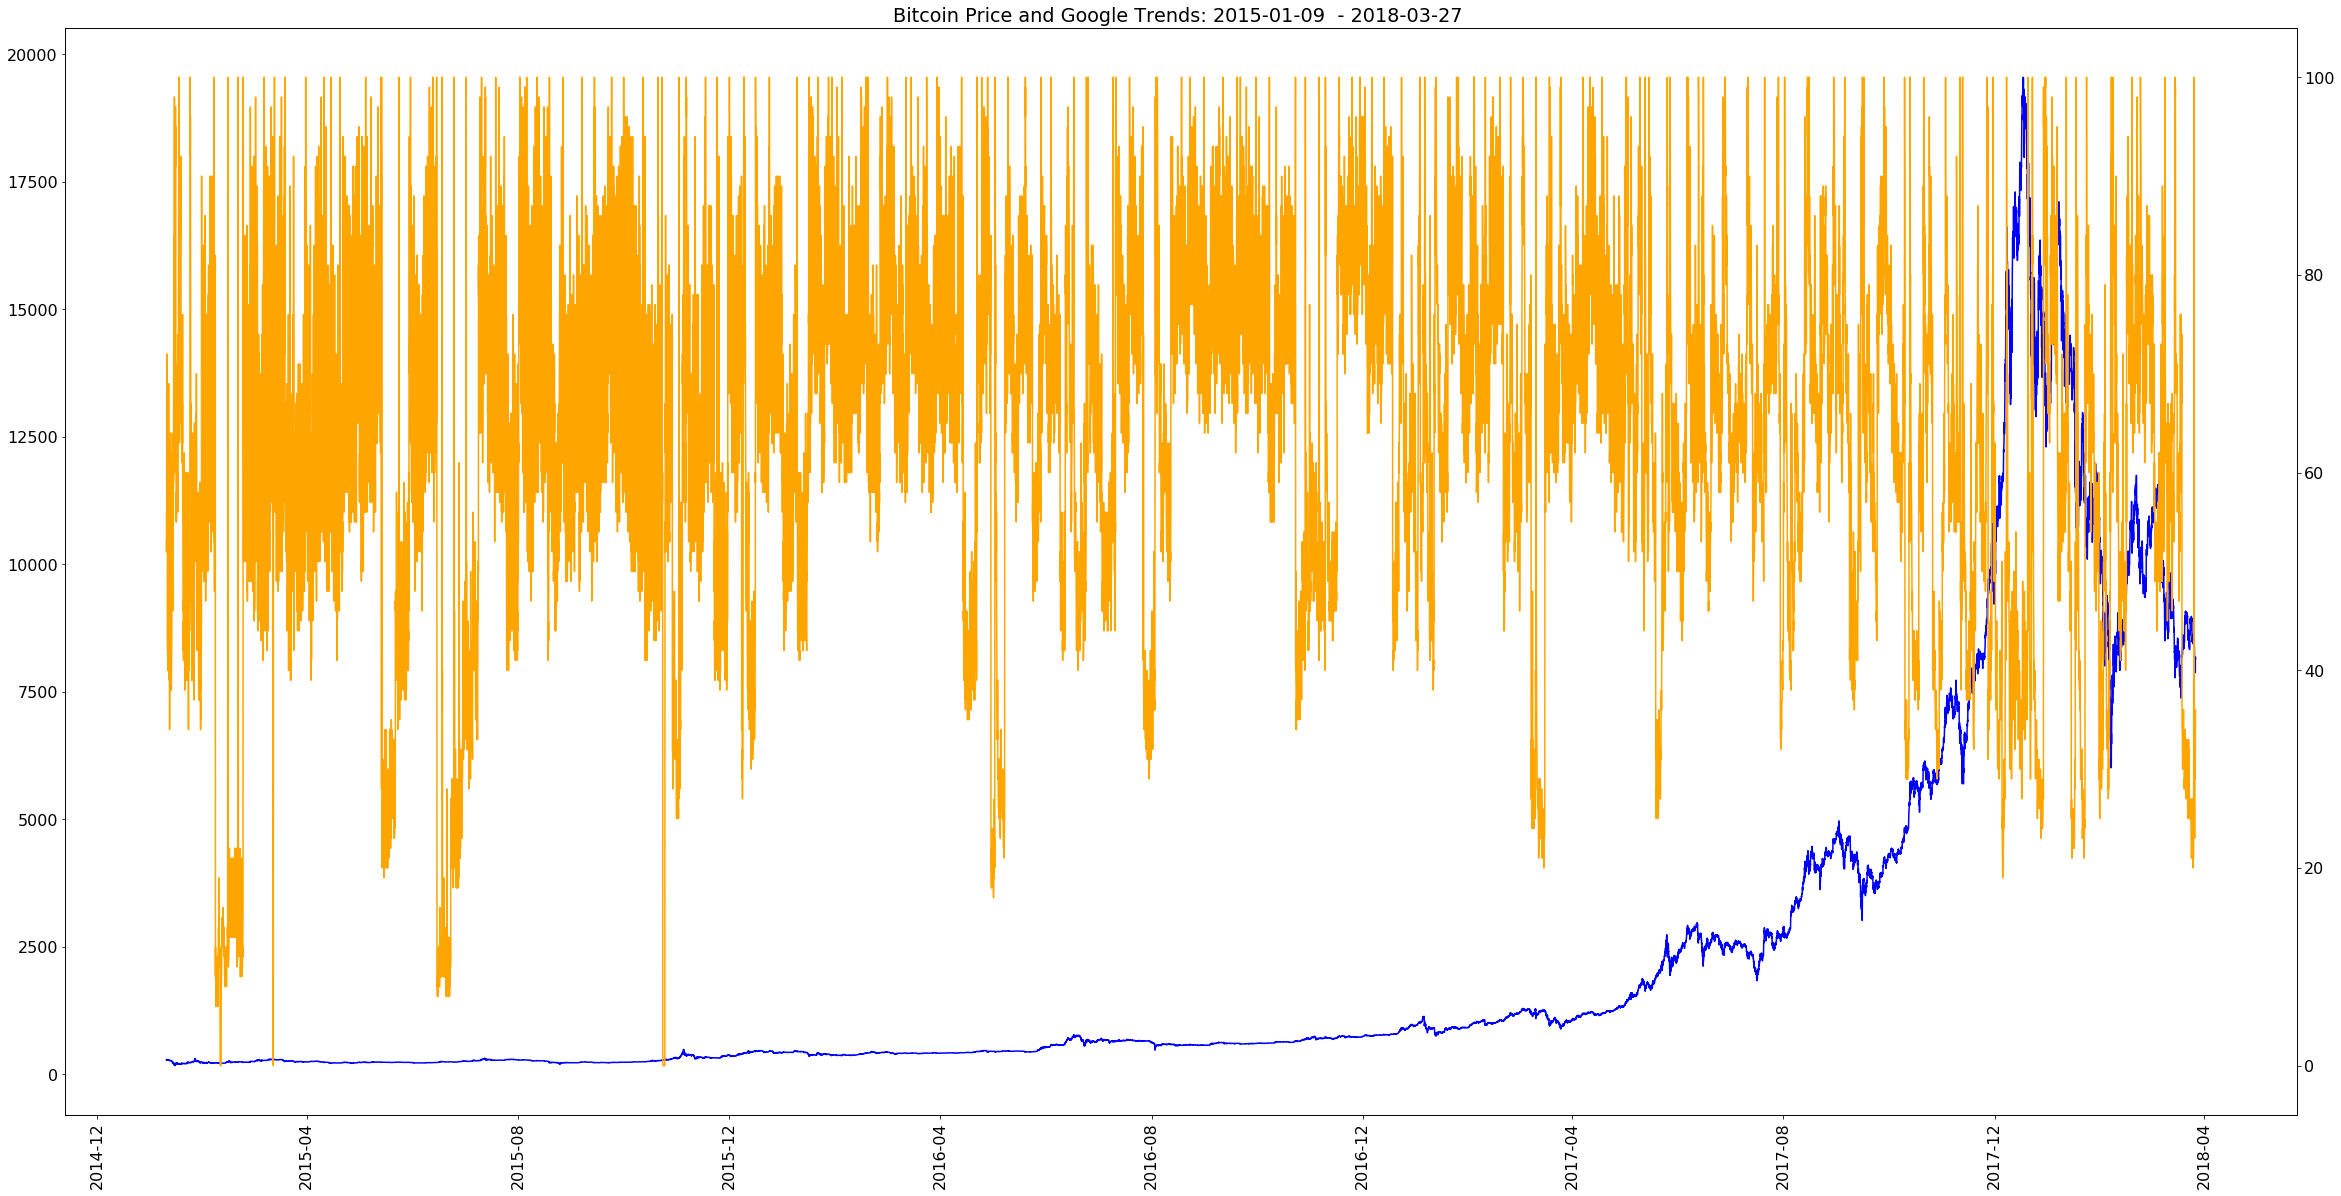

In [22]:
import matplotlib.pyplot as plt

btc_and_trends_df_hourly = pd.merge(left=btc_df, left_on="Timestamp", right=google_trends_df, right_on="Timestamp")

fig_bitcoin_overall, ax_bitcoin_overall = plt.subplots(figsize=(40,20)) 
ax_bitcoin_overall.plot(btc_and_trends_df_hourly["Date(UTC)"], btc_and_trends_df_hourly["Close"], color='blue')
ax_bitcoin_overall_2 = ax_bitcoin_overall.twinx() 
ax_bitcoin_overall_2.plot(btc_and_trends_df_hourly["Date(UTC)"], btc_and_trends_df_hourly["Bitcoin"], color='orange' )
ax_bitcoin_overall.set_title('Bitcoin Price and Google Trends: ' + str(btc_and_trends_df_hourly["Date(UTC)"].iloc[0])[:-8] + ' - ' + str(btc_and_trends_df_hourly["Date(UTC)"].iloc[-1])[:-8] )
for tick in ax_bitcoin_overall.get_xticklabels():
    tick.set_rotation(90)
plt.show();


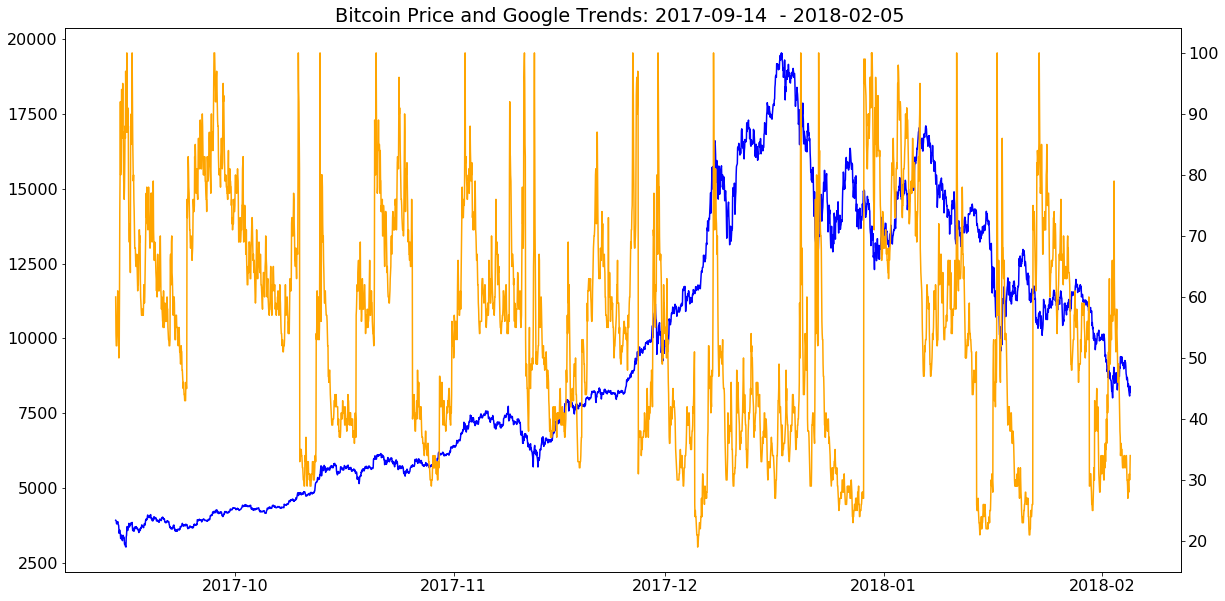

In [23]:
import matplotlib.pyplot as plt

# visualize Bitcoin's recent super spike starting Sep 2017 
sep_2017_to_feb_2018_df = btc_and_trends_df_hourly[ (btc_and_trends_df_hourly["Timestamp"] > 1505347200) & (btc_and_trends_df_hourly["Timestamp"] <=  1517788800) ]
#display(sep_2017_to_feb_2018_df)

fig_bitcoin_spike, ax_bitcoin_spike = plt.subplots(figsize=(20,10)) 
ax_bitcoin_spike.plot(sep_2017_to_feb_2018_df["Date(UTC)"], sep_2017_to_feb_2018_df["Close"], color='blue')
ax_bitcoin_spike_2 = ax_bitcoin_spike.twinx() 
ax_bitcoin_spike_2.plot(sep_2017_to_feb_2018_df["Date(UTC)"], sep_2017_to_feb_2018_df["Bitcoin"], color='orange' )
ax_bitcoin_spike.set_title('Bitcoin Price and Google Trends: ' + str(sep_2017_to_feb_2018_df["Date(UTC)"].iloc[0])[:-8] + ' - ' + str(sep_2017_to_feb_2018_df["Date(UTC)"].iloc[-1])[:-8] )
for tick in ax_bitcoin_overall.get_xticklabels():
    tick.set_rotation(90)
plt.show();

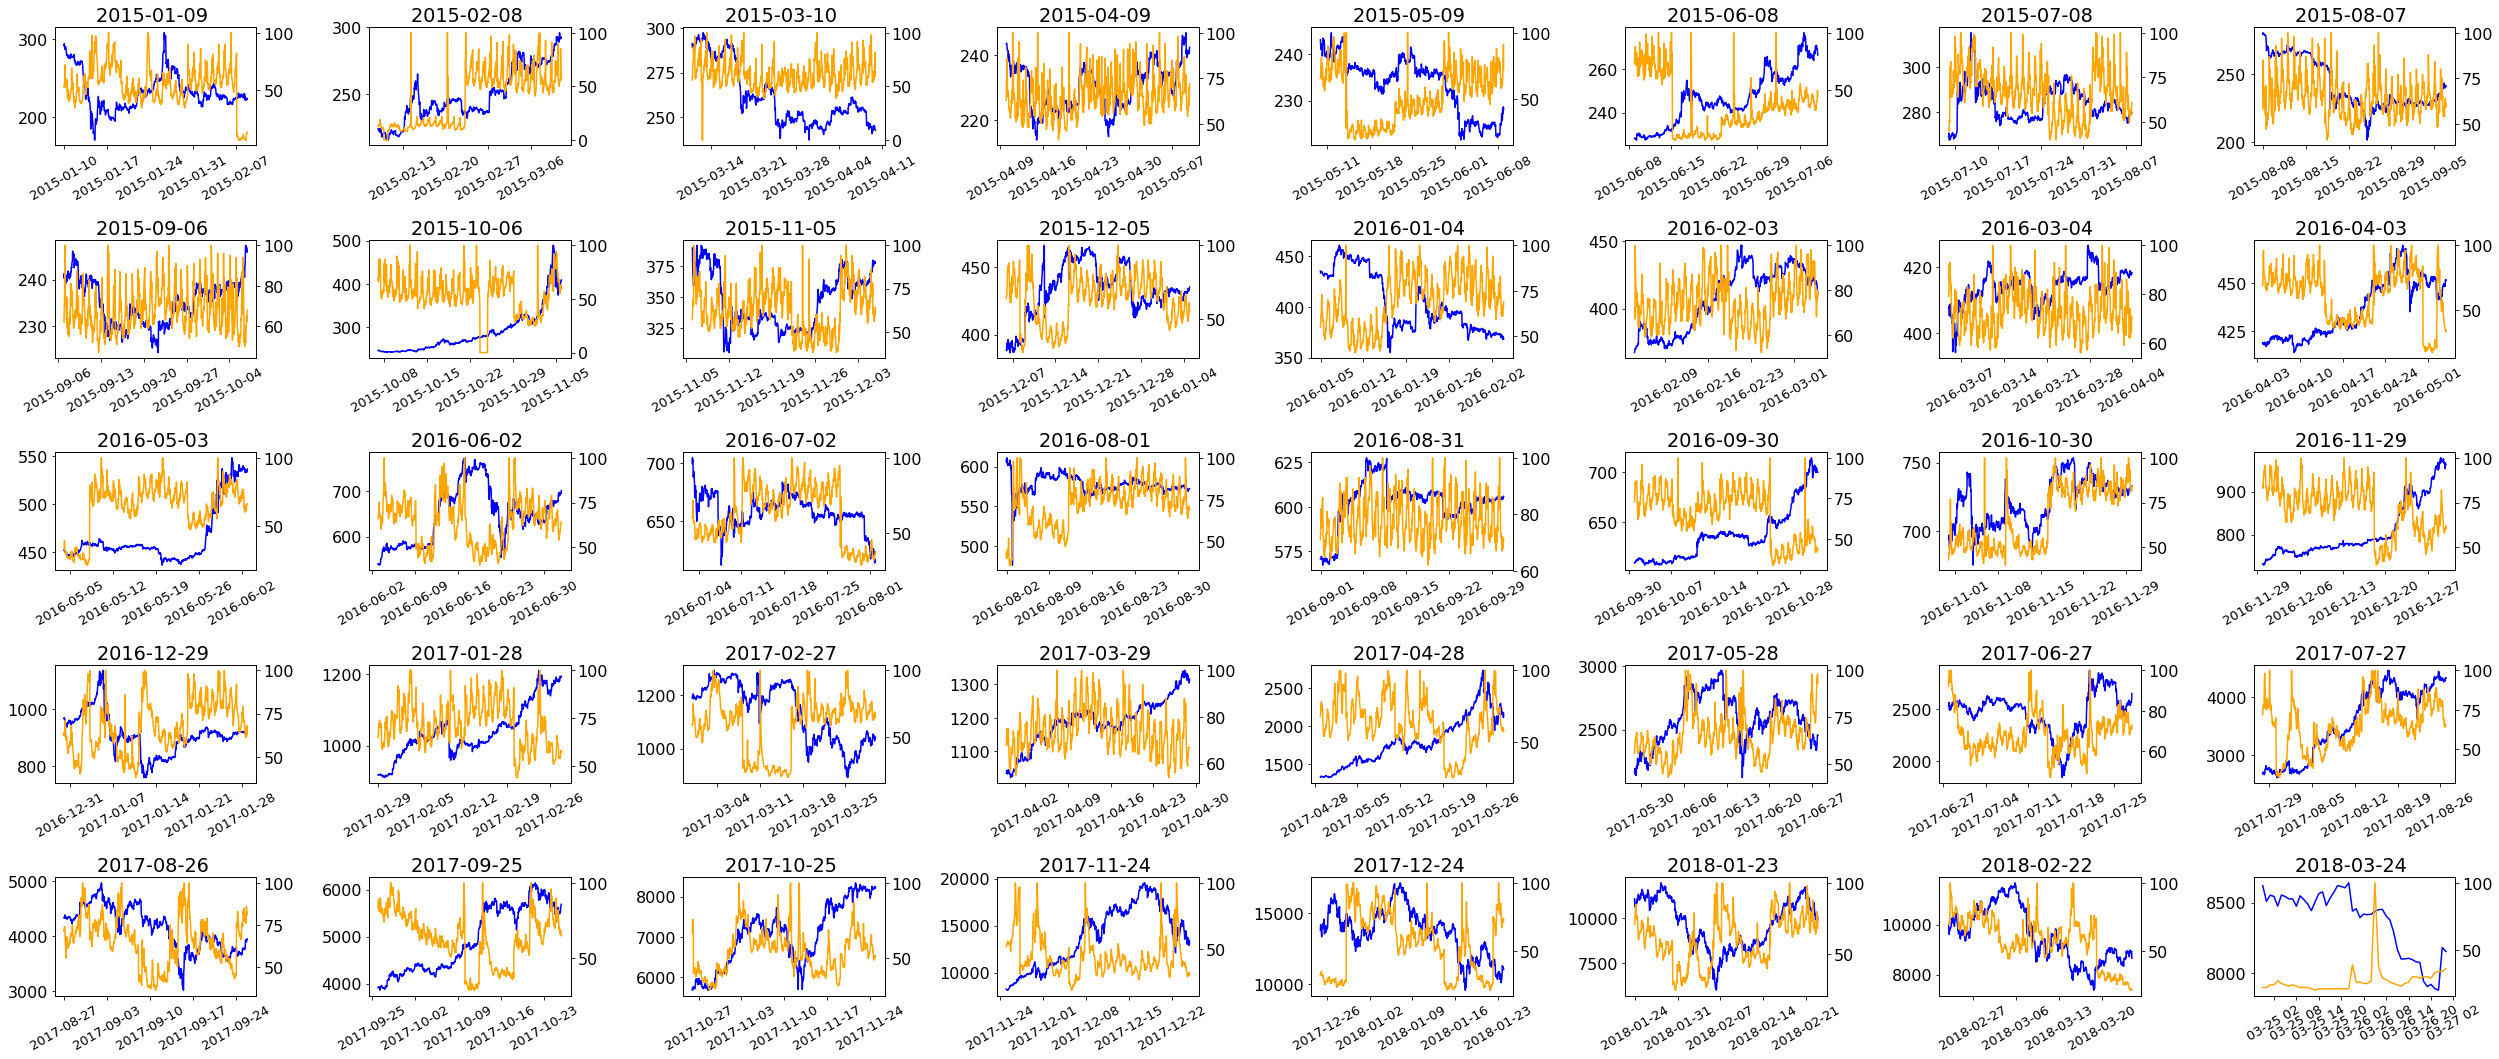

In [33]:
# from sklearn import preprocessing
# min_max_scaler=preprocessing.MinMaxScaler()

#change so that it just creates a new column

# btc_and_trends_df_hourly[['close_normalized','bitcoin_normalized']] = btc_and_trends_df_hourly[['Close','Bitcoin']]

# btc_and_trends_df_hourly[['close_normalized','bitcoin_normalized']] = min_max_scaler.fit_transform(btc_and_trends_df_hourly[['close_normalized','bitcoin_normalized']])
# btc_and_trends_df_hourly.head()

# fig, ax = plt.subplots()
# ax.plot(btc_and_trends_df_hourly["Date"], btc_and_trends_df_hourly["close_normalized"])
# ax.plot(btc_and_trends_df_hourly["Date"], btc_and_trends_df_hourly["bitcoin_normalized"])
# ax.set_title("Bitcoin Close Prices and Google Trends Normalized")
# ax.set(ylabel="price and trend, scaled to 0-1",xlabel="time")
# plt.show()

fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(35,15), sharex=False, sharey=False)

start_timestamp = btc_and_trends_df_hourly["Timestamp"][0] 
end_timestamp = btc_and_trends_df_hourly["Timestamp"].iloc[-1] 

for i, ax in enumerate(axes.flatten()):
    in_range_df = btc_and_trends_df_hourly[ (btc_and_trends_df_hourly["Timestamp"] > start_timestamp) & (btc_and_trends_df_hourly["Timestamp"] <= start_timestamp+2592000) ]
    ax.plot(in_range_df["Date(UTC)"], in_range_df["Close"], color='blue')
    ax2 = ax.twinx() 
    ax2.plot(in_range_df["Date(UTC)"], in_range_df["Bitcoin"], color='orange' )
    ax.set_title(str(in_range_df["Date(UTC)"].iloc[0])[:-8])
    start_timestamp += 2592000
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
        tick.set_fontsize(13)
        
#     labels = [item.get_text() for item in ax.get_xticklabels()]
#     labels_modified = [label[5:] for label in labels] 
#     ax.set_xticklabels(labels_modified)
        
#         tick_label = tick.get_text()
#         display(tick_label)
#         tick.set_text(tick_label[5:]) Doesnt work!
    
plt.rcParams.update({'font.size': 16})
fig.tight_layout()
plt.show();

# Orange is Google Trends Hourly Data for the keyword 'Bitcoin'
# Blue is Bitcoin Hourly Close Data 

In [10]:
from luminol.anomaly_detector import AnomalyDetector 
from luminol.correlator import Correlator

# Convert dataframe into dictionary to put into luminol
timestamp_close_df = btc_and_trends_df_hourly[['Timestamp', 'Close']]
timestamp_bitcoin_trend_df = btc_and_trends_df_hourly[['Timestamp', 'Bitcoin']]
display(timestamp_close_df.head())
display(timestamp_bitcoin_trend_df.head())

timestamp_close_dict = timestamp_close_df.set_index('Timestamp')['Close'].to_dict()
timestamp_bitcoin_trend_dict = timestamp_bitcoin_trend_df.set_index('Timestamp')['Bitcoin'].to_dict()

# anomaly detector 
anomaly_detector = AnomalyDetector(timestamp_close_dict)
score = anomaly_detector.get_all_scores()

for timestamp, value in score.iteritems():
    # print anomaly score if greater than 0 
    if (value > 0 ):
        readable_date = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H')
        print(readable_date,'->', value)
    
# correlate Close price and Google Trends
anomalies = anomaly_detector.get_anomalies()
for anomaly in anomalies:
    time_period = anomaly.get_time_window()
    
    # to do: tweek the parameters for correlator (like the shift allowed)
    correlator = Correlator(timestamp_close_dict, timestamp_bitcoin_trend_dict, time_period)
    if correlator.is_correlated(threshold=0.5):
        print("Trend data correlate with Price at time period (%d, %d)" % time_period)



,Timestamp,Close
0,1420840800,289.13
1,1420844400,292.15
2,1420848000,293.89
3,1420851600,289.10
4,1420855200,288.59


,Timestamp,Bitcoin
0,1420840800,53
1,1420844400,52
2,1420848000,52
3,1420851600,56
4,1420855200,53


2017-10-04 03 -> 86.0
2017-10-04 04 -> 114.0
2017-10-04 05 -> 146.0
2017-10-04 06 -> 182.0
2017-10-04 07 -> 222.0
2017-10-04 08 -> 266.0
2017-10-04 09 -> 314.0
2017-10-04 10 -> 366.0
2017-10-04 11 -> 422.0
2017-10-04 12 -> 482.0
2017-10-04 13 -> 546.0
2017-10-04 14 -> 614.0
2017-10-04 15 -> 686.0
2017-10-04 16 -> 762.0
2017-10-04 17 -> 842.0
2017-10-04 18 -> 926.0
2017-10-04 19 -> 1014.0
2017-10-04 20 -> 1106.0
2017-10-04 21 -> 1202.0
2017-10-04 22 -> 1302.0
2017-10-04 23 -> 1406.0
2017-10-05 00 -> 1514.0
2017-10-05 01 -> 1626.0
2017-10-05 02 -> 1742.0
2017-10-05 03 -> 1862.0
2017-10-05 04 -> 1986.0
2017-10-05 05 -> 2114.0
2017-10-05 06 -> 2246.0
2017-10-05 07 -> 2382.0
2017-10-05 08 -> 2522.0
2017-10-05 09 -> 2666.0
2017-10-05 10 -> 2814.0
2017-10-05 11 -> 2966.0
2017-10-05 12 -> 3122.0
2017-10-05 13 -> 3282.0
2017-10-05 14 -> 3446.0
2017-10-05 15 -> 3614.0
2017-10-05 16 -> 3786.0
2017-10-05 17 -> 3962.0
2017-10-05 18 -> 4142.0
2017-10-05 19 -> 4326.0
2017-10-05 20 -> 4514.0
2017-10-0

2017-11-21 17 -> 3170.0
2017-11-21 18 -> 3330.0
2017-11-21 19 -> 3494.0
2017-11-21 20 -> 3662.0
2017-11-21 21 -> 3834.0
2017-11-21 22 -> 4010.0
2017-11-21 23 -> 4114.0
2017-11-22 00 -> 4114.0
2017-11-22 01 -> 4114.0
2017-11-22 02 -> 4114.0
2017-11-22 03 -> 4114.0
2017-11-22 04 -> 4114.0
2017-11-22 05 -> 4114.0
2017-11-22 06 -> 4114.0
2017-11-22 07 -> 4114.0
2017-11-22 08 -> 4222.0
2017-11-22 09 -> 4332.0
2017-11-22 10 -> 4332.0
2017-11-22 11 -> 4332.0
2017-11-22 12 -> 4446.0
2017-11-22 13 -> 4634.0
2017-11-22 14 -> 4752.0
2017-11-22 15 -> 4752.0
2017-11-22 16 -> 4752.0
2017-11-22 17 -> 4874.0
2017-11-22 18 -> 4998.0
2017-11-22 19 -> 4998.0
2017-11-22 20 -> 4998.0
2017-11-22 21 -> 4998.0
2017-11-22 22 -> 5126.0
2017-11-22 23 -> 5256.0
2017-11-23 00 -> 5390.0
2017-11-23 01 -> 5594.0
2017-11-23 02 -> 5802.0
2017-11-23 03 -> 6014.0
2017-11-23 04 -> 6230.0
2017-11-23 05 -> 6450.0
2017-11-23 06 -> 6674.0
2017-11-23 07 -> 6902.0
2017-11-23 08 -> 7134.0
2017-11-23 09 -> 7370.0
2017-11-23 10 ->

2017-12-18 11 -> 11450.0
2017-12-18 12 -> 11754.0
2017-12-18 13 -> 12062.0
2017-12-18 14 -> 12374.0
2017-12-18 15 -> 12690.0
2017-12-18 16 -> 13010.0
2017-12-18 17 -> 13186.0
2017-12-18 18 -> 13186.0
2017-12-18 19 -> 13186.0
2017-12-18 20 -> 13186.0
2017-12-18 21 -> 13186.0
2017-12-18 22 -> 13186.0
2017-12-18 23 -> 13186.0
2017-12-19 00 -> 13186.0
2017-12-19 01 -> 13366.0
2017-12-19 02 -> 13694.0
2017-12-19 03 -> 13878.0
2017-12-19 04 -> 13878.0
2017-12-19 05 -> 13878.0
2017-12-19 06 -> 13878.0
2017-12-19 07 -> 13878.0
2017-12-19 08 -> 13878.0
2017-12-19 09 -> 14066.0
2017-12-19 10 -> 14256.0
2017-12-19 11 -> 14256.0
2017-12-19 12 -> 14256.0
2017-12-19 13 -> 14256.0
2017-12-19 14 -> 14256.0
2017-12-19 15 -> 14450.0
2017-12-19 16 -> 14790.0
2017-12-19 17 -> 15134.0
2017-12-19 18 -> 15482.0
2017-12-19 19 -> 15834.0
2017-12-19 20 -> 16190.0
2017-12-19 21 -> 16550.0
2017-12-19 22 -> 16914.0
2017-12-19 23 -> 17282.0
2017-12-20 00 -> 17654.0
2017-12-20 01 -> 18030.0
2017-12-20 02 -> 18410.0


2018-01-15 03 -> 7814.0
2018-01-15 04 -> 7568.0
2018-01-15 05 -> 7326.0
2018-01-15 06 -> 7088.0
2018-01-15 07 -> 6854.0
2018-01-15 08 -> 6624.0
2018-01-15 09 -> 6398.0
2018-01-15 10 -> 6176.0
2018-01-15 11 -> 5958.0
2018-01-15 12 -> 5744.0
2018-01-15 13 -> 5534.0
2018-01-15 14 -> 5328.0
2018-01-15 15 -> 5126.0
2018-01-15 16 -> 4928.0
2018-01-15 17 -> 4734.0
2018-01-15 18 -> 4544.0
2018-01-15 19 -> 4358.0
2018-01-15 20 -> 4176.0
2018-01-15 21 -> 3998.0
2018-01-15 22 -> 3824.0
2018-01-15 23 -> 3654.0
2018-01-16 00 -> 3488.0
2018-01-16 01 -> 3326.0
2018-01-16 02 -> 3168.0
2018-01-16 03 -> 3014.0
2018-01-16 04 -> 2864.0
2018-01-16 05 -> 2718.0
2018-01-16 06 -> 2576.0
2018-01-16 07 -> 2438.0
2018-01-16 08 -> 2304.0
2018-01-16 09 -> 2174.0
2018-01-16 10 -> 2048.0
2018-01-16 11 -> 1926.0
2018-01-16 12 -> 1808.0
2018-01-16 13 -> 1694.0
2018-01-16 14 -> 1584.0
2018-01-16 15 -> 1478.0
2018-01-16 16 -> 1376.0
2018-01-16 17 -> 1278.0
2018-01-16 18 -> 1210.0
2018-01-16 19 -> 1210.0
2018-01-16 20 ->

2018-02-16 04 -> 57470.0
2018-02-16 05 -> 56454.0
2018-02-16 06 -> 55446.0
2018-02-16 07 -> 55112.0
2018-02-16 08 -> 54782.0
2018-02-16 09 -> 53798.0
2018-02-16 10 -> 52494.0
2018-02-16 11 -> 51206.0
2018-02-16 12 -> 49934.0
2018-02-16 13 -> 48678.0
2018-02-16 14 -> 47438.0
2018-02-16 15 -> 46214.0
2018-02-16 16 -> 45006.0
2018-02-16 17 -> 43814.0
2018-02-16 18 -> 42638.0
2018-02-16 19 -> 41478.0
2018-02-16 20 -> 40334.0
2018-02-16 21 -> 39206.0
2018-02-16 22 -> 38094.0
2018-02-16 23 -> 36998.0
2018-02-17 00 -> 35918.0
2018-02-17 01 -> 34854.0
2018-02-17 02 -> 33806.0
2018-02-17 03 -> 32774.0
2018-02-17 04 -> 31758.0
2018-02-17 05 -> 30758.0
2018-02-17 06 -> 29774.0
2018-02-17 07 -> 28806.0
2018-02-17 08 -> 27854.0
2018-02-17 09 -> 26918.0
2018-02-17 10 -> 25998.0
2018-02-17 11 -> 25094.0
2018-02-17 12 -> 24206.0
2018-02-17 13 -> 23334.0
2018-02-17 14 -> 22478.0
2018-02-17 15 -> 21638.0
2018-02-17 16 -> 20814.0
2018-02-17 17 -> 20006.0
2018-02-17 18 -> 19214.0
2018-02-17 19 -> 18438.0


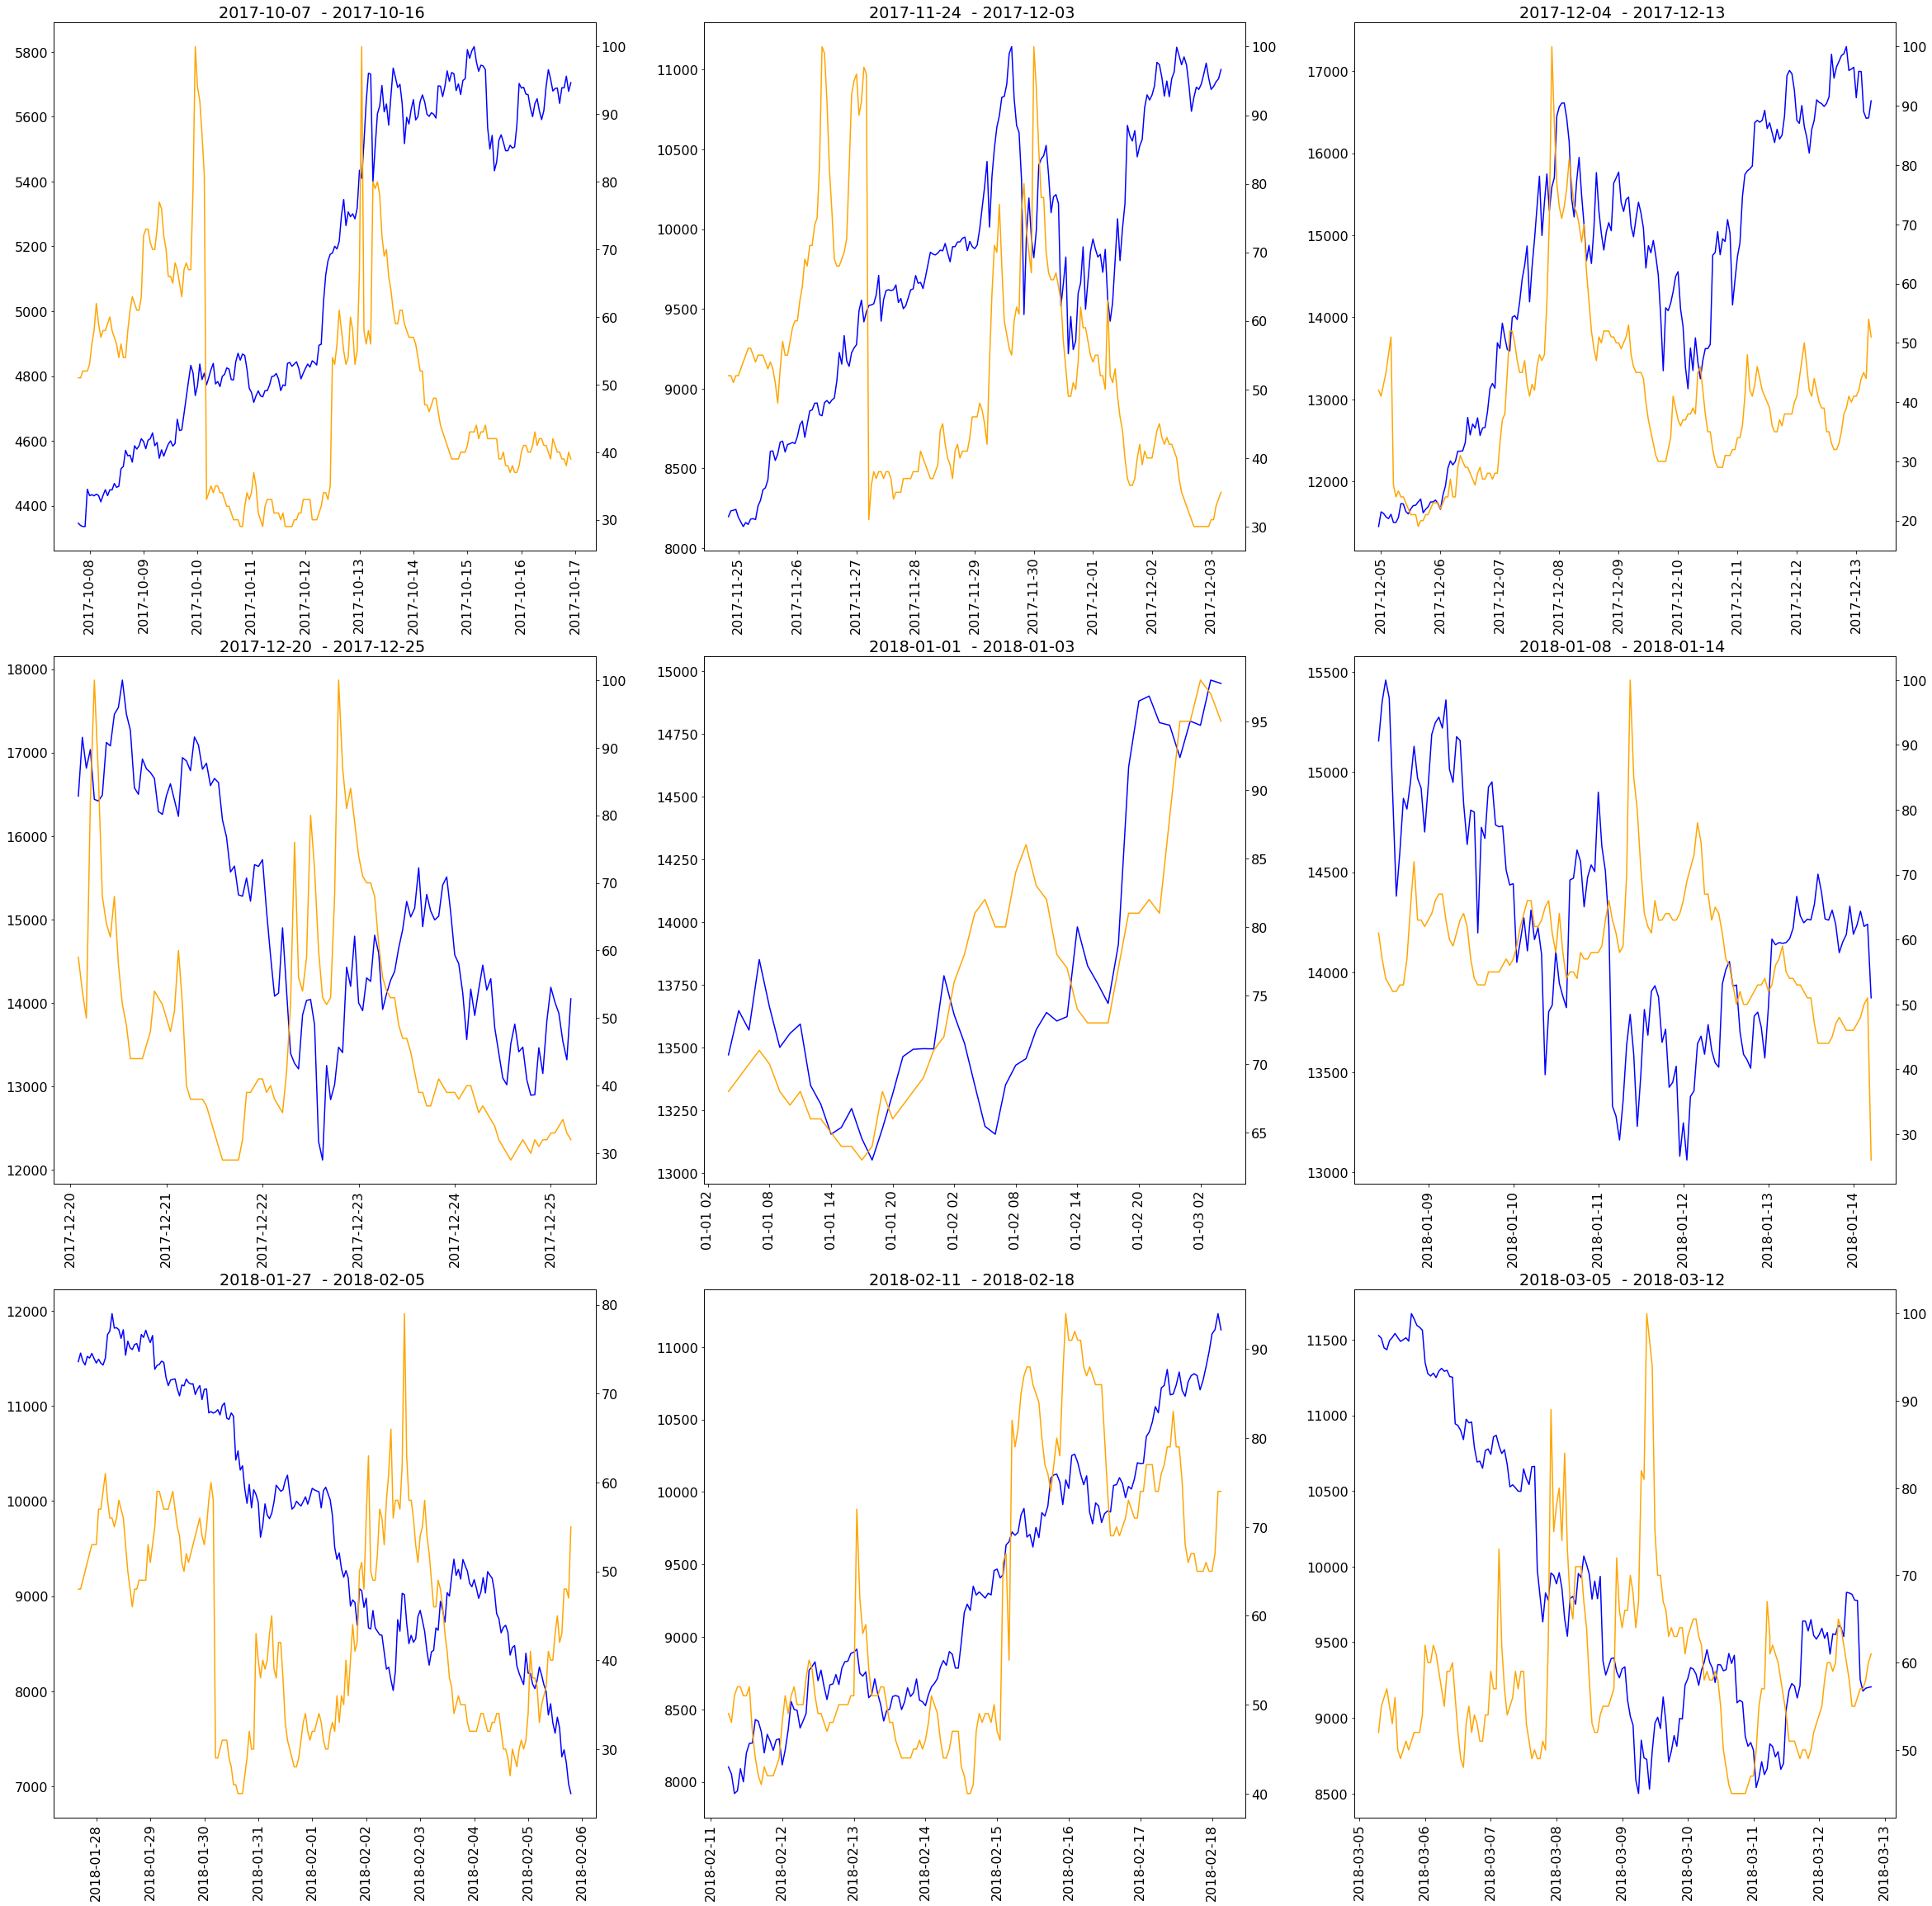

In [13]:
fig2, axes2 = plt.subplots(nrows=3, ncols=3, figsize=(40,40), sharex=False, sharey=False)

#for i, anomaly in enumerate(anomalies):
for i, ax in enumerate(axes2.flatten()):    
    time_period = anomalies[i].get_time_window()
    start_timestamp = time_period[0]
    end_timestamp = time_period[1] 
        
    in_range_df = btc_and_trends_df_hourly[ (btc_and_trends_df_hourly["Timestamp"] > start_timestamp) & (btc_and_trends_df_hourly["Timestamp"] <= end_timestamp) ]
    #display(in_range_df)
    ax.plot(in_range_df["Date(UTC)"], in_range_df["Close"], color='blue')
    ax2 = ax.twinx() 
    ax2.plot(in_range_df["Date(UTC)"], in_range_df["Bitcoin"], color='orange' )
    ax.set_title(str(in_range_df["Date(UTC)"].iloc[0])[:-8] + ' - ' + str(in_range_df["Date(UTC)"].iloc[-1])[:-8] )
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    
fig.tight_layout()
fig.subplots_adjust(hspace=2)
plt.show();

# Blue is Price, Orange is Trend. 
# TODO: NEED TO UPDATE TO CHANGE THE FOR LOOP TO NUMBER OF ANOMALIES!!!!!!!

In [ ]:
# to do: find out when google trend data had anomalies 